In [1]:
!pip install Sastrawi


In [2]:
import pandas as pd
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


In [3]:
import os

print("Working directory sekarang:")
print(os.getcwd())

print("\nIsi folder ini:")
print(os.listdir())

print("\nIsi folder parent (..):")
print(os.listdir(".."))


Working directory sekarang:
d:\cloning\spam_buzzer\jupyter

Isi folder ini:
['app.py', 'buzzer.ipynb', 'model_lr.pkl', 'requirements.txt', 'tfidf.pkl']

Isi folder parent (..):
['.git', 'buzzer1.ipynb', 'jupyter', 'src', 'tiktok_comments.csv', 'tiktok_comments3.csv']


In [4]:
# Data Collection & Cleaning
import pandas as pd
df = pd.read_csv("../tiktok_comments.csv")

print("Jumlah data awal:", len(df))
df.head()
df = df.dropna(subset=["comment"])
df = df.drop_duplicates(subset=["comment"])

print("Jumlah data setelah cleaning:", len(df))


Jumlah data awal: 3327
Jumlah data setelah cleaning: 3093


In [5]:
# Text Preprocessing
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


In [7]:
# inisialisasi stemmer & stopword
stemmer = StemmerFactory().create_stemmer()
stopword = StopWordRemoverFactory().create_stop_word_remover()

In [8]:
# fungsi preprocessing
def clean_text(text):
    # 1. lowercase
    text = text.lower()
    
    # 2. hapus URL
    text = re.sub(r"http\S+|www\S+", "", text)
    
    # 3. hapus angka
    text = re.sub(r"\d+", "", text)
    
    # 4. hapus simbol selain huruf dan spasi (AMAN)
    text = re.sub(r"[^a-z\s]", " ", text)
    
    # 5. rapihin spasi
    text = re.sub(r"\s+", " ", text).strip()
       
    # 8. rapihin spasi akhir
    text = re.sub(r"\s+", " ", text).strip()
    
    return text



# terapkan preprocessing
df["clean_comment"] = df["comment"].apply(clean_text)
df[["comment", "clean_comment"]].head(10)



,comment,clean_comment
0,baru kali ini sepanjang sejarah setiap ada dem...,baru kali ini sepanjang sejarah setiap ada dem...
1,pdhal mereka di gaji dari uang rakyat !! tp ma...,pdhal mereka di gaji dari uang rakyat tp mala ...
2,yg smpe guling2 kasian 😭😭😭,yg smpe guling kasian
3,beraninya pake senjata polisi anjjj,beraninya pake senjata polisi anjjj
4,pas demo kaya gini kira kira para pejabat dima...,pas demo kaya gini kira kira para pejabat dima...
5,Prabowo diem aja bela pendemo aja enggak mana ...,prabowo diem aja bela pendemo aja enggak mana ...
6,intinya gk ush bayar pajak ketar ketir mereka\...,intinya gk ush bayar pajak ketar ketir mereka ...
7,"seriusan nanya, emang polisi gak di ajarin ya ...",seriusan nanya emang polisi gak di ajarin ya c...
8,"Akun2 live demo,.banyak di blokir...tetap soli...",akun live demo banyak di blokir tetap solid ra...
9,"Ya Allah..itu aparat kenapa menyakiti rakyat, ...",ya allah itu aparat kenapa menyakiti rakyat bu...


In [21]:
def tokenizer(text):
    return re.findall(r"\b[a-z]+\b", text.lower())
tokens = tokenizer(df["clean_comment"].iloc[0])
print(tokens[:50])

['baru', 'kali', 'ini', 'sepanjang', 'sejarah', 'setiap', 'ada', 'demo', 'presiden', 'tidak', 'memberi', 'tanggapan', 'apapun', 'seakan', 'akan', 'tidak', 'tau', 'dan', 'tidak', 'mau', 'tau']


In [41]:
# @title Tahap 3: Normalisasi Kata Gaul
# Kamus Singkatan (Bisa Anda tambah sendiri)
kamus_gaul = {
    # yang sudah ada
    'yg': 'yang', 'ga': 'tidak', 'gak': 'tidak', 'nggak': 'tidak',
    'bgt': 'banget', 'sdh': 'sudah', 'udh': 'sudah', 'klo': 'kalo',
    'gk': 'tidak', 'gw': 'saya', 'lu': 'kamu', 'ak': 'aku',
    'ush': 'usah', 'kmn': 'kemana', 'gmn': 'bagaimana',
    'tmn': 'teman', 'bs': 'bisa', 'knp': 'kenapa',
    'utk': 'untuk', 'mkn': 'makan', 'nt': 'nice try', 'ez': 'mudah',
    'anj': 'anjing', 'kntl': 'kontol', 'jir': 'anjing', 'ajg': 'anjing',
    'mmk': 'memek', 'bngst': 'bangsat', 'anjg': 'anjing', 'smpe': 'sampai',
    # tambahan dari dataset TikTok
    'pdhl': 'padahal',
    'pdhal': 'padahal',
    'tp': 'tapi',
    'trs': 'terus',
    'mala': 'malah',
    'anjjj': 'anjing',
    'lg': 'lagi',
    'lgi': 'lagi',
    'lgsg': 'langsung',
    'tdk': 'tidak',
    'jd': 'jadi',
    'jdi': 'jadi',
    'aja': 'saja',
    'bae': 'saja',
    'doang': 'saja',
    'sampe': 'sampai',
    'ampe': 'sampai',
    'pake': 'pakai',
    'org': 'orang',
    'blm': 'belum',
    'dr': 'dari',
    'dri': 'dari',
    'krn': 'karena',
    'emg': 'memang',
    'bner': 'benar',
    'kmrn': 'kemarin',
    'byr': 'bayar',
    'pny': 'punya',
    'plg': 'pulang',
    'ny': 'nya',
    'nyaa': 'nya',
    'sm': 'sama',
    'bkn': 'bukan',
    'kpn': 'kapan',
    'mnrt': 'menurut',
    'pls': 'tolong',
    'gpp': 'tidak apa apa',
    'ngapain': 'melakukan apa',
    'krg': 'kurang',
    'td': 'tadi',
    'sblm': 'sebelum',
    'hrs': 'harus',
    'msh': 'masih',
    'bbrp': 'beberapa',
    'jgn': 'jangan',
    'jg': 'juga'
}
def normalisasi(teks):
    kata_baru = []
    for kata in teks.split():
        if kata in kamus_gaul:
            kata_baru.append(kamus_gaul[kata])
        else:
            kata_baru.append(kata)
    return " ".join(kata_baru)

# Terapkan
print("Sedang menormalisasi singkatan...")
df['clean_comment1'] = df['clean_comment'].apply(normalisasi)

print("Selesai Normalisasi!")
print(df['clean_comment1'].head(10))

Sedang menormalisasi singkatan...
Selesai Normalisasi!
0    baru kali ini sepanjang sejarah setiap ada dem...
1    padahal mereka di gaji dari uang rakyat tapi m...
2                            yang sampai guling kasian
3                beraninya pakai senjata polisi anjing
4    pas demo kaya gini kira kira para pejabat dima...
5    prabowo diem saja bela pendemo saja enggak man...
6    intinya tidak usah bayar pajak ketar ketir mer...
7    seriusan nanya emang polisi tidak di ajarin ya...
8    akun live demo banyak di blokir tetap solid ra...
9    ya allah itu aparat kenapa menyakiti rakyat bu...
Name: clean_comment1, dtype: object


In [42]:
def clean_text(text):
    
    # 6. stopword removal
    text = stopword.remove(text)
    # 7. stemming
    text = stemmer.stem(text)

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# inisialisasi TF-IDF
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)  # unigram + bigram (lebih kuat)
)

# transform teks ke vektor
X = tfidf.fit_transform(df["clean_comment1"])

print("Shape TF-IDF:", X.shape)


Shape TF-IDF: (3093, 5000)


In [44]:
SPAM_PROMOSI = [
    # umum
    "klik", "link", "bio", "dm", "wa", "whatsapp",
    "gratis", "saldo", "cuan", "follow", "promo",
    "jual", "order", "hubungi", "web kami",

    # e-commerce
    "diskon", "murah", "harga spesial", "limited",
    "ready stock", "preorder", "po",
    "cek toko", "open order", "open po", "beli sekarang",

    # scam / engagement bait
    "giveaway", "hadiah", "menang", "transfer",
    "daftar sekarang", "klik sekarang",
    "langsung cair", "tanpa modal",
    "donasi", "rekening donasi",

    # medsos
    "follow balik", "follow back",
    "cek profil", "kunjungi profil",
    "chat admin", "hubungi admin", "link di bio",

    # viral / propaganda
    "please share", "tolong share", "share ke semua",
    "sebarkan", "viralkan", "copy paste",
    "tag media", "tag international media",
    "tag media internasional", "tag bbc", "tag cnn",
    "tag un", "tag human rights",

    # platform
    "facebook", "fb", "telegram",
    "ig story", "tiktok", "youtube", "wa grup",

    # engagement bait
    "up guys", "naikkan", "biar viral", "biar rame",
    "biar dilihat", "komen dong", "komen yuk", "ramein",

    # koordinasi demo (KRITIS)
    "info kumpul", "titik kumpul", "kumpul dimana",
    "otw jakarta", "otw jkrt",
    "ayo ikut", "siap turun",
    "ikut demo", "ayo demo", "gas demo", "gass",
    "kepung dpr", "blokir jalan"
]

KATA_KASAR = [
    # Indonesia umum
    "anjing", "bangsat", "goblok", "tolol", "babi",
    "ngentot", "jancuk", "kampret", "tai",
    "bodoh", "idiot", "dongo", "bebal",
    "sialan", "brengsek", "kurang ajar",
    "otak udang",

    # slang / sensor bypass
    "anjir", "anjay", "anying",
    "bangke", "bacot", "bacod", "bacot lu",
    "anjg", "bgst", "gblk",

    # merendahkan
    "ga guna", "tidak berguna",
    "sampah", "pecundang", "lemah", "munafik",

    # politik / institusi (DOMINAN di dataset kamu)
    "tikus dpr", "tikus berdasi",
    "pemerintah busuk", "aparat busuk",
    "polisi bayaran", "polisi korup", "isilop",

    # kriminal / internasional
    "pelacur", "criminal", "murderer", "bastard",

    # nepali / hindi (muncul nyata di data sosmed)
    "hatyara", "ghatiya", "jyanmara",
    "nalayak", "kukkur", "chor", "chor neta"
]


PROVOKASI_KERAS = [
    # kekerasan langsung
    "bunuh", "bakar", "serang", "pukul", "hajar",
    "tendang", "keroyok", "habisi", "tembak",
    "golok", "senjata", "peluru",

    # perusakan & chaos
    "hancurkan", "rusak", "hancurin",
    "jarah", "lempar batu", "rusuh",
    "kerusuhan", "bakar kantor",

    # hasutan
    "ganyang", "perang",
    "lawan pemerintah", "lawan aparat",
    "adu domba",

    # anti-negara
    "tidak usah bayar pajak",
    "berhenti bayar pajak",
    "boikot",
    "bubar dpr",
    "jatuhkan pemerintah",
    "gulingkan rezim",

    # demo eskalatif
    "turun ke jalan",
    "ayo demo",
    "demo terus",
    "kepung",
    "blokir jalan",
    "ayo rusuh",

    # ekstrem (PRIORITAS FLAG)
    "bunuh polisi",
    "serang polisi",
    "ambil senjata",
    "balas dengan peluru"
    # hashtag / slogan gerakan
    "#savekopikeliling",
    "#savekangcilok",
    "hidup rakyat",
    "hidup rakyattt",
    "hidup rakyatttt",
    "demo core",

    # ajakan & propaganda politik
    "tangkap jokowi",
    "bubarkan dpr",
    "dpr harus turun gaji",
    "potong gaji dpr",
    "gaji dpr jangan",
    "pemilu nanti ga akan pilih",
    "jangan pilih dpr",
    "ulang 1998",
    "1998 harus kita ulangi",

    "day 1",
    "day 2",
    "day 3",
    "hari pertama demo",
    "hari kedua demo",
    "hari ketiga demo",
    "demo resmi",
    "belum terkomando",
    "massa underground",
    "pasukan hoodie hitam",
    "barisan massa",

    # tekanan & boikot ekonomi
    "gausah bayar pajak",
    "gak usah bayar pajak",
    "jangan bayar pajak",
    "boikot pajak",

    # tag institusi / figur (viral pressure)
    "@bbc",
    "@cnn",
    "@un",
    "@human rights watch",
    "@dpr",
    "@dprd",

    # narasi viral & framing
    "musuhnya negara sendiri",
    "perang lawan rakyat",
    "perang lawan rakyat sendiri",
    "kebal hukum",
    "kebal demonstrasi",
    "pintu terbuka lebar",
    "katanya pintu terbuka",

    # engagement emosional massal
    "doakan mereka",
    "doakan pendemo",
    "lindungi pendemo",
    "stay safe",
    "jaga keselamatan",
    "semoga selamat semua"
]





def label_spam(text):
    # spam eksplisit
    if any(k in text for k in SPAM_PROMOSI):
        return 1
    
    # kata kasar
    if any(k in text for k in KATA_KASAR):
        return 1
    
    # provokasi keras
    if any(k in text for k in PROVOKASI_KERAS):
        return 1

    # selain itu dianggap NON-SPAM
    return 0

# buat kolom label
df["label"] = df["clean_comment"].apply(label_spam)

df["label"].value_counts()


df[["clean_comment1", "label"]].head(10)



,clean_comment1,label
0,baru kali ini sepanjang sejarah setiap ada dem...,1
1,padahal mereka di gaji dari uang rakyat tapi m...,0
2,yang sampai guling kasian,0
3,beraninya pakai senjata polisi anjing,1
4,pas demo kaya gini kira kira para pejabat dima...,0
5,prabowo diem saja bela pendemo saja enggak man...,0
6,intinya tidak usah bayar pajak ketar ketir mer...,0
7,seriusan nanya emang polisi tidak di ajarin ya...,1
8,akun live demo banyak di blokir tetap solid ra...,0
9,ya allah itu aparat kenapa menyakiti rakyat bu...,0


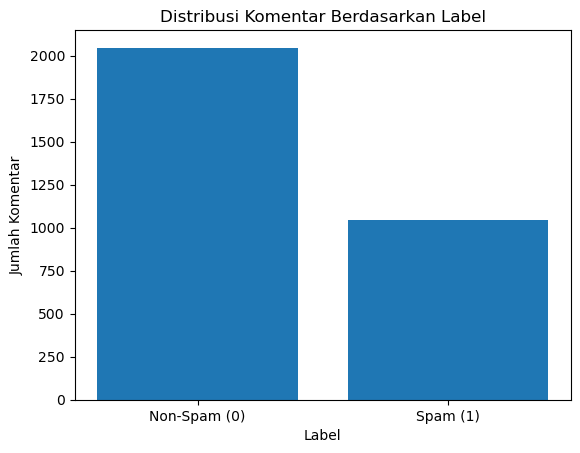

Jumlah data per label:
label
0    2046
1    1047
Name: count, dtype: int64


In [46]:
import matplotlib.pyplot as plt

# Hitung jumlah data per label
label_counts = df['label'].value_counts().sort_index()

# Plot
plt.figure()
plt.bar(['Non-Spam (0)', 'Spam (1)'], label_counts.values)
plt.xlabel('Label')
plt.ylabel('Jumlah Komentar')
plt.title('Distribusi Komentar Berdasarkan Label')
plt.show()

# Print jumlahnya biar jelas
print("Jumlah data per label:")
print(label_counts)


In [47]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,               # hasil TF-IDF
    df["label"],     # label spam / non-spam
    test_size=0.2,
    random_state=42,
    stratify=df["label"]
)

print("Data train:", X_train.shape)
print("Data test :", X_test.shape)


Data train: (2474, 5000)
Data test : (619, 5000)


In [48]:
from skopt import BayesSearchCV
from sklearn.linear_model import LogisticRegression


In [49]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform

param_dist = {
    "C": loguniform(1e-3, 1e2),
    "solver": ["liblinear", "saga"]
}

lr = LogisticRegression(
    max_iter=2000,
    class_weight="balanced"
)

search = RandomizedSearchCV(
    lr,
    param_distributions=param_dist,
    n_iter=20,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)

print("Best params:", search.best_params_)


Best params: {'C': np.float64(73.92266140516048), 'solver': 'liblinear'}


In [50]:
from skopt import BayesSearchCV
from sklearn.naive_bayes import MultinomialNB

nb_search_space = {
    'alpha': (1e-3, 10.0, 'log-uniform')
}

nb_base = MultinomialNB()

nb_bayes = BayesSearchCV(
    estimator=nb_base,
    search_spaces=nb_search_space,
    n_iter=20,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    random_state=42
)

print("Training Naive Bayes dengan Bayesian Optimization...")
nb_bayes.fit(X_train, y_train)

best_nb = nb_bayes.best_estimator_

print("Best NB Params:", nb_bayes.best_params_)


Training Naive Bayes dengan Bayesian Optimization...
Best NB Params: OrderedDict([('alpha', 0.013258955335684516)])


In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# =========================
# FIT ULANG MODEL (AMAN)
# =========================

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Logistic Regression terbaik (hasil tuning)
best_lr = search.best_estimator_

# Assign agar konsisten
best_nb = nb_model


In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_lr = best_lr.predict(X_test)
y_pred_nb = best_nb.predict(X_test)

print("\n=== ACCURACY ===")
print("Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print("Naive Bayes        :", accuracy_score(y_test, y_pred_nb))

print("\n=== CLASSIFICATION REPORT - LOGISTIC REGRESSION ===")
print(classification_report(y_test, y_pred_lr))

print("\n=== CLASSIFICATION REPORT - NAIVE BAYES ===")
print(classification_report(y_test, y_pred_nb))

print("\n=== CONFUSION MATRIX - LOGISTIC REGRESSION ===")
print(confusion_matrix(y_test, y_pred_lr))

print("\n=== CONFUSION MATRIX - NAIVE BAYES ===")
print(confusion_matrix(y_test, y_pred_nb))



=== ACCURACY ===
Logistic Regression: 0.851373182552504
Naive Bayes        : 0.7657512116316639

=== CLASSIFICATION REPORT - LOGISTIC REGRESSION ===
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       409
           1       0.80      0.75      0.77       210

    accuracy                           0.85       619
   macro avg       0.84      0.83      0.83       619
weighted avg       0.85      0.85      0.85       619


=== CLASSIFICATION REPORT - NAIVE BAYES ===
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       409
           1       0.90      0.35      0.50       210

    accuracy                           0.77       619
   macro avg       0.82      0.66      0.67       619
weighted avg       0.80      0.77      0.73       619


=== CONFUSION MATRIX - LOGISTIC REGRESSION ===
[[370  39]
 [ 53 157]]

=== CONFUSION MATRIX - NAIVE BAYES ===
[[401   8]
 [137  73]]


In [21]:
import pickle

# simpan model Logistic Regression TERBAIK
with open("model_lr.pkl", "wb") as f:
    pickle.dump(best_lr, f)

# simpan TF-IDF
with open("tfidf.pkl", "wb") as f:
    pickle.dump(tfidf, f)

print("Model dan TF-IDF berhasil disimpan")


Model dan TF-IDF berhasil disimpan


In [23]:
print(type(tfidf))
print(type(best_lr))


<class 'sklearn.feature_extraction.text.TfidfVectorizer'>
<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_lr = best_lr.predict(X_test)
y_pred_nb = best_nb.predict(X_test)

print("\n=== ACCURACY ===")
print("Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print("Naive Bayes        :", accuracy_score(y_test, y_pred_nb))

print("\n=== CLASSIFICATION REPORT - LOGISTIC REGRESSION ===")
print(classification_report(y_test, y_pred_lr))

print("\n=== CLASSIFICATION REPORT - NAIVE BAYES ===")
print(classification_report(y_test, y_pred_nb))

print("\n=== CONFUSION MATRIX - LOGISTIC REGRESSION ===")
print(confusion_matrix(y_test, y_pred_lr))

print("\n=== CONFUSION MATRIX - NAIVE BAYES ===")
print(confusion_matrix(y_test, y_pred_nb))


NameError: name 'best_lr' is not defined

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# =========================
# MODELING
# =========================

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
print("Naive Bayes training selesai")

# Logistic Regression (handling imbalance) donsempling,bayesian optimaz
lr_model = LogisticRegression(
    max_iter=2000,
    class_weight='balanced'
)
lr_model.fit(X_train, y_train)
print("Logistic Regression training selesai")

# =========================
# EVALUATION
# =========================

# Prediksi
y_pred_nb = nb_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

print("\n=== ACCURACY ===")
print("Naive Bayes        :", accuracy_score(y_test, y_pred_nb))
print("Logistic Regression:", accuracy_score(y_test, y_pred_lr))

print("\n=== CLASSIFICATION REPORT - NAIVE BAYES ===")
print(classification_report(y_test, y_pred_nb))

print("\n=== CLASSIFICATION REPORT - LOGISTIC REGRESSION ===")
print(classification_report(y_test, y_pred_lr))

print("\n=== CONFUSION MATRIX - NAIVE BAYES ===")
print(confusion_matrix(y_test, y_pred_nb))

print("\n=== CONFUSION MATRIX - LOGISTIC REGRESSION ===")
print(confusion_matrix(y_test, y_pred_lr))


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# =========================
# MODELING
# =========================

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
print("Naive Bayes training selesai")

# Logistic Regression (handling imbalance)
lr_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)
lr_model.fit(X_train, y_train)
print("Logistic Regression training selesai")

# =========================
# EVALUATION
# =========================

# Prediksi
y_pred_nb = nb_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

print("\n=== ACCURACY ===")
print("Naive Bayes        :", accuracy_score(y_test, y_pred_nb))
print("Logistic Regression:", accuracy_score(y_test, y_pred_lr))

print("\n=== CLASSIFICATION REPORT - NAIVE BAYES ===")
print(classification_report(y_test, y_pred_nb))

print("\n=== CLASSIFICATION REPORT - LOGISTIC REGRESSION ===")
print(classification_report(y_test, y_pred_lr))

print("\n=== CONFUSION MATRIX - NAIVE BAYES ===")
print(confusion_matrix(y_test, y_pred_nb))

print("\n=== CONFUSION MATRIX - LOGISTIC REGRESSION ===")
print(confusion_matrix(y_test, y_pred_lr))


In [ ]:
import pickle

# simpan model Logistic Regression
with open("model_lr.pkl", "wb") as f:
    pickle.dump(lr_model, f)

# simpan TF-IDF (NAMANYA tfidf)
with open("tfidf.pkl", "wb") as f:
    pickle.dump(tfidf, f)

print("Model dan TF-IDF berhasil disimpan")


In [ ]:
print(type(tfidf))
print(type(lr_model))
